# Open, clean light curves

First, open the raw FITS files from MAST, load them into `LightCurve` objects for both long and short cadence data. save to `raw_long` and `raw_short` directories.

In [16]:
%load_ext autoreload
%autoreload 2

import os
from glob import glob
from data_cleaner import LightCurve

path_to_fits_files = '/local/tmp/hat11/010748390/'

# Retrieve long and short cadence data
long_cadence_paths = glob(os.path.join(path_to_fits_files, '*llc.fits'))
short_cadence_paths = glob(os.path.join(path_to_fits_files, '*slc.fits'))

long_lc = LightCurve.from_raw_fits(long_cadence_paths, name='raw_long')
short_lc = LightCurve.from_raw_fits(short_cadence_paths, name='raw_short')

data_path = '/astro/users/bmmorris/git/hat-11/data'
long_lc.save_to(data_path)
short_lc.save_to(data_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


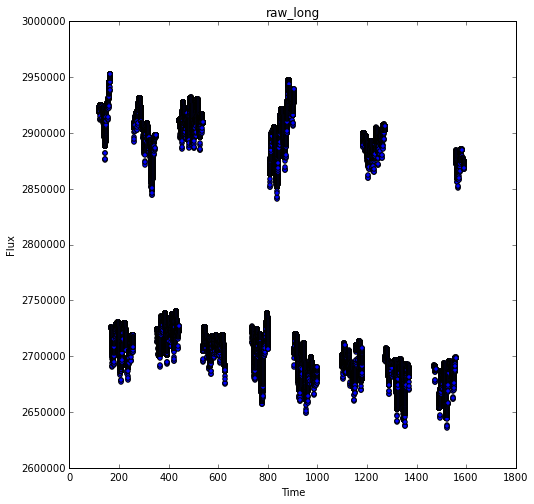

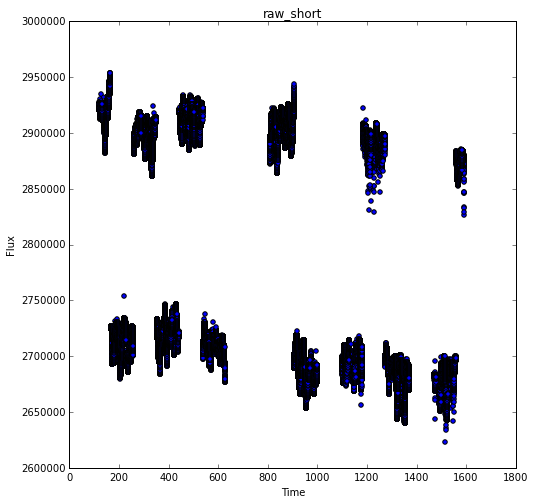

In [2]:
%matplotlib inline
long_lc.plot()
short_lc.plot()

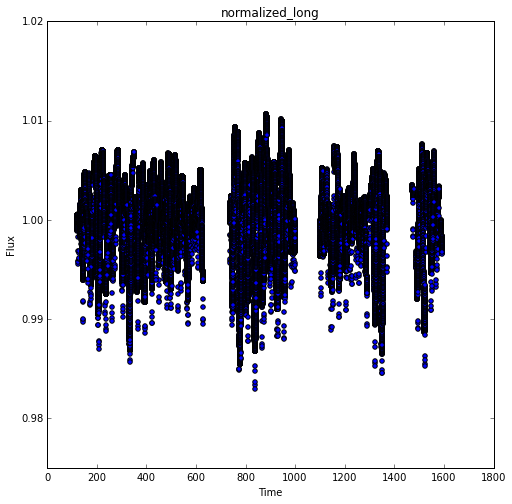

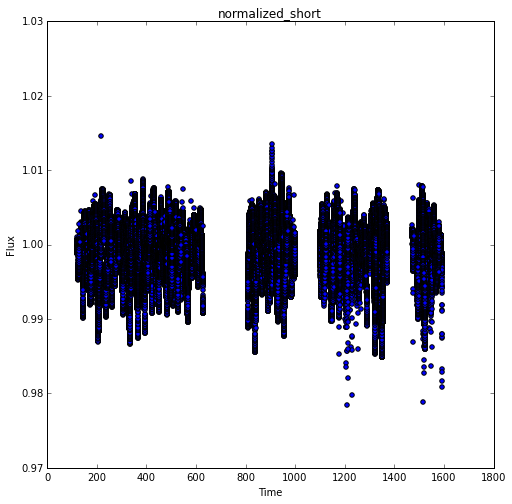

In [18]:
# Fit 2nd order polynomial to each quarter, divide to normalize
long_lc.normalize_each_quarter(rename='normalized_long')
short_lc.normalize_each_quarter(rename='normalized_short')

# Plot results, save
long_lc.plot()
short_lc.plot()

long_lc.save_to(data_path)
short_lc.save_to(data_path)